# Question 3

### Monty Hall Problem
It is a famous probabilistic problem which defies our intuition. The statement of the problem is that we are in a game show where Monty(host) presents us similar looking doors. Behind one of these doors is a prize (historically, a car) and goats in other. We are asked to pick a door and then Monty knowing the door behind which the car is, opens a door other than our chosen door and the correct door. He now asks if we would like to switch our initial choice. Without much thought, it might seem like it wouldnt make a difference and the probability of us winning still remaind the same but careful calculations (and simulation, as we have done below) shows that the probability of us winning if we switch from our initial choice is higher than if we dont switch.

#### For the case with 3 doors
![Monty Hall Decision Tree](img/decision_tree.png "Decision Tree") Source: https://brilliant.org/wiki/monty-hall-problem/

From the decision tree, we can see that in the case when we switch the probability of us winning is 2/3 as opposed to 1/3 when we dont switch.

In [24]:
import mt_prng as mt
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

r = mt.mt_seed(5489)

In [25]:
'''Function for the monty_hall problem for n doors'''

def monty_hall(switch, doors):
    correct = mt.randint(1,doors+1) #The door behind which the correct prize is registered randomly
    chosen = mt.randint(1,doors+1)  #Our choice is registered randomly
    
    if chosen != correct :         #If the door we chose is not the correct door
        av_doors = np.arange(1,doors+1) #All the available doors
        if chosen or correct in av_doors : #Condition to let Monty(host) open a door other than the correct/chosen
            index = [np.where(av_doors==chosen), np.where(av_doors==correct)] 
            monty_doors = np.delete(av_doors,index) #deleting the correct/chosen doors from list of available doors
            monty_opens = mt.mt_choice(monty_doors) #randomly choosing a door to open. Note : it cant be chosen/correct
    elif chosen == correct : #If the door we chose is correct
        av_doors = np.arange(1,doors+1) #All the available doors
        if chosen in av_doors : #Note : In this case, only one door has to be deleted in the list of available doors
            index = [np.where(av_doors==chosen)]
            monty_doors = np.delete(av_doors,index)
            monty_opens = mt.mt_choice(monty_doors) #randomly choosing a door to open. Note : it can't be chosen(correct)

    
    if switch : #Condition if we switch from out initial choice (chosen)
        final_choices = np.delete(av_doors,[np.where(av_doors ==monty_opens),np.where(av_doors == chosen)]) 
        #Our final choice can't be the door which monty opens and our initial choice since we switch. So we delete those choices
        #from the list of available doors
        final_choice = mt.mt_choice(final_choices) #randomly choosing our final choice
#         
    else :
        final_choice = chosen #Condition if we dont switch. Our final choice remains the inital choice (chosen)
    
    win = final_choice ==correct #Output true if our final choice is the correct choice otherwise false
    
    return win


'''Monte Carlo simulation for monty_hall problem where n is the number of iterations'''
def monty_hall_sim(n,doors):
    win_w_switch=0 #no. of wins when we switch
    win_wo_switch=0 #no. of wins when we dont switch
    for i in range(n):
        win = monty_hall(True,doors) #True here refers to when we switch
        if win==True :
            win_w_switch+=1
        win = monty_hall(False,doors) #False here refers to when we dont switch
        if win ==True:
            win_wo_switch+=1
    print("Probability of games won with switching :" , win_w_switch/n)
    print("Probability of games won without switching :", win_wo_switch/n)
                
            

In [26]:
monty_hall_sim(10000,3) #no. of iterations = 10,000 and no. of doors = 3

Probability of games won with switching : 0.6639
Probability of games won without switching : 0.3346


### We see that the probability of winning when we switch is higher as our theoretical calculations suggest

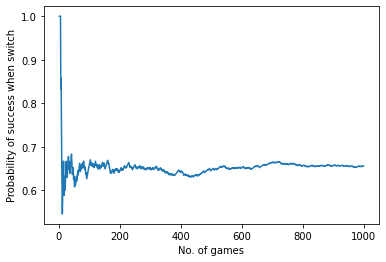

In [27]:
win_switch = 0
win_2=[]
index=1
for i in range(1000):
    win_3 = monty_hall(True,3)
    if win_3==True:
        win_switch+=1
    else : 
        win_3+=0
    probability = win_switch/index
    index+=1
    win_2.append(probability)
plt.xlabel('No. of games')
plt.ylabel('Probability of success when switch')
plt.plot([a for a in range(1,len(win_2)+1)],win_2)
    

### In this plot we can see that as the no. of games increases, the probability of winning when we switch settles down at 2/3